In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.shape[0]

768

In [57]:
df.shape[1]

9

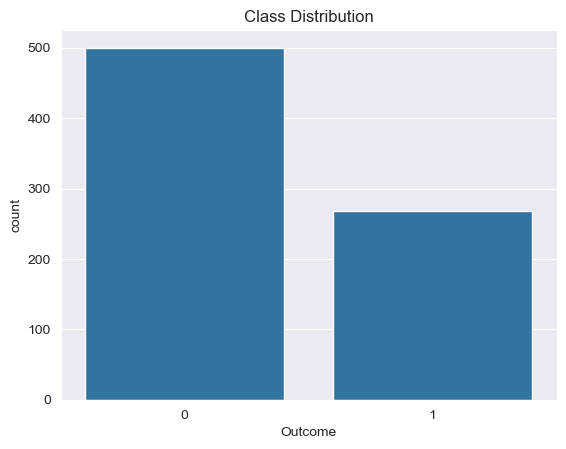

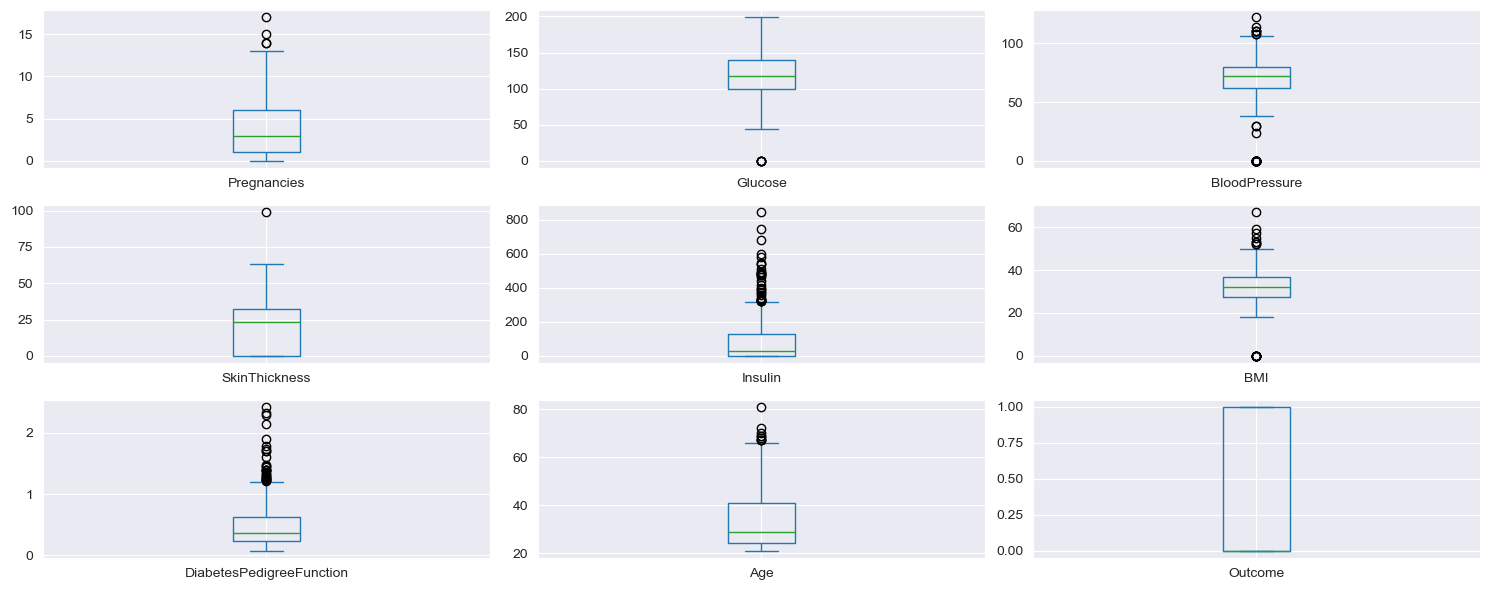

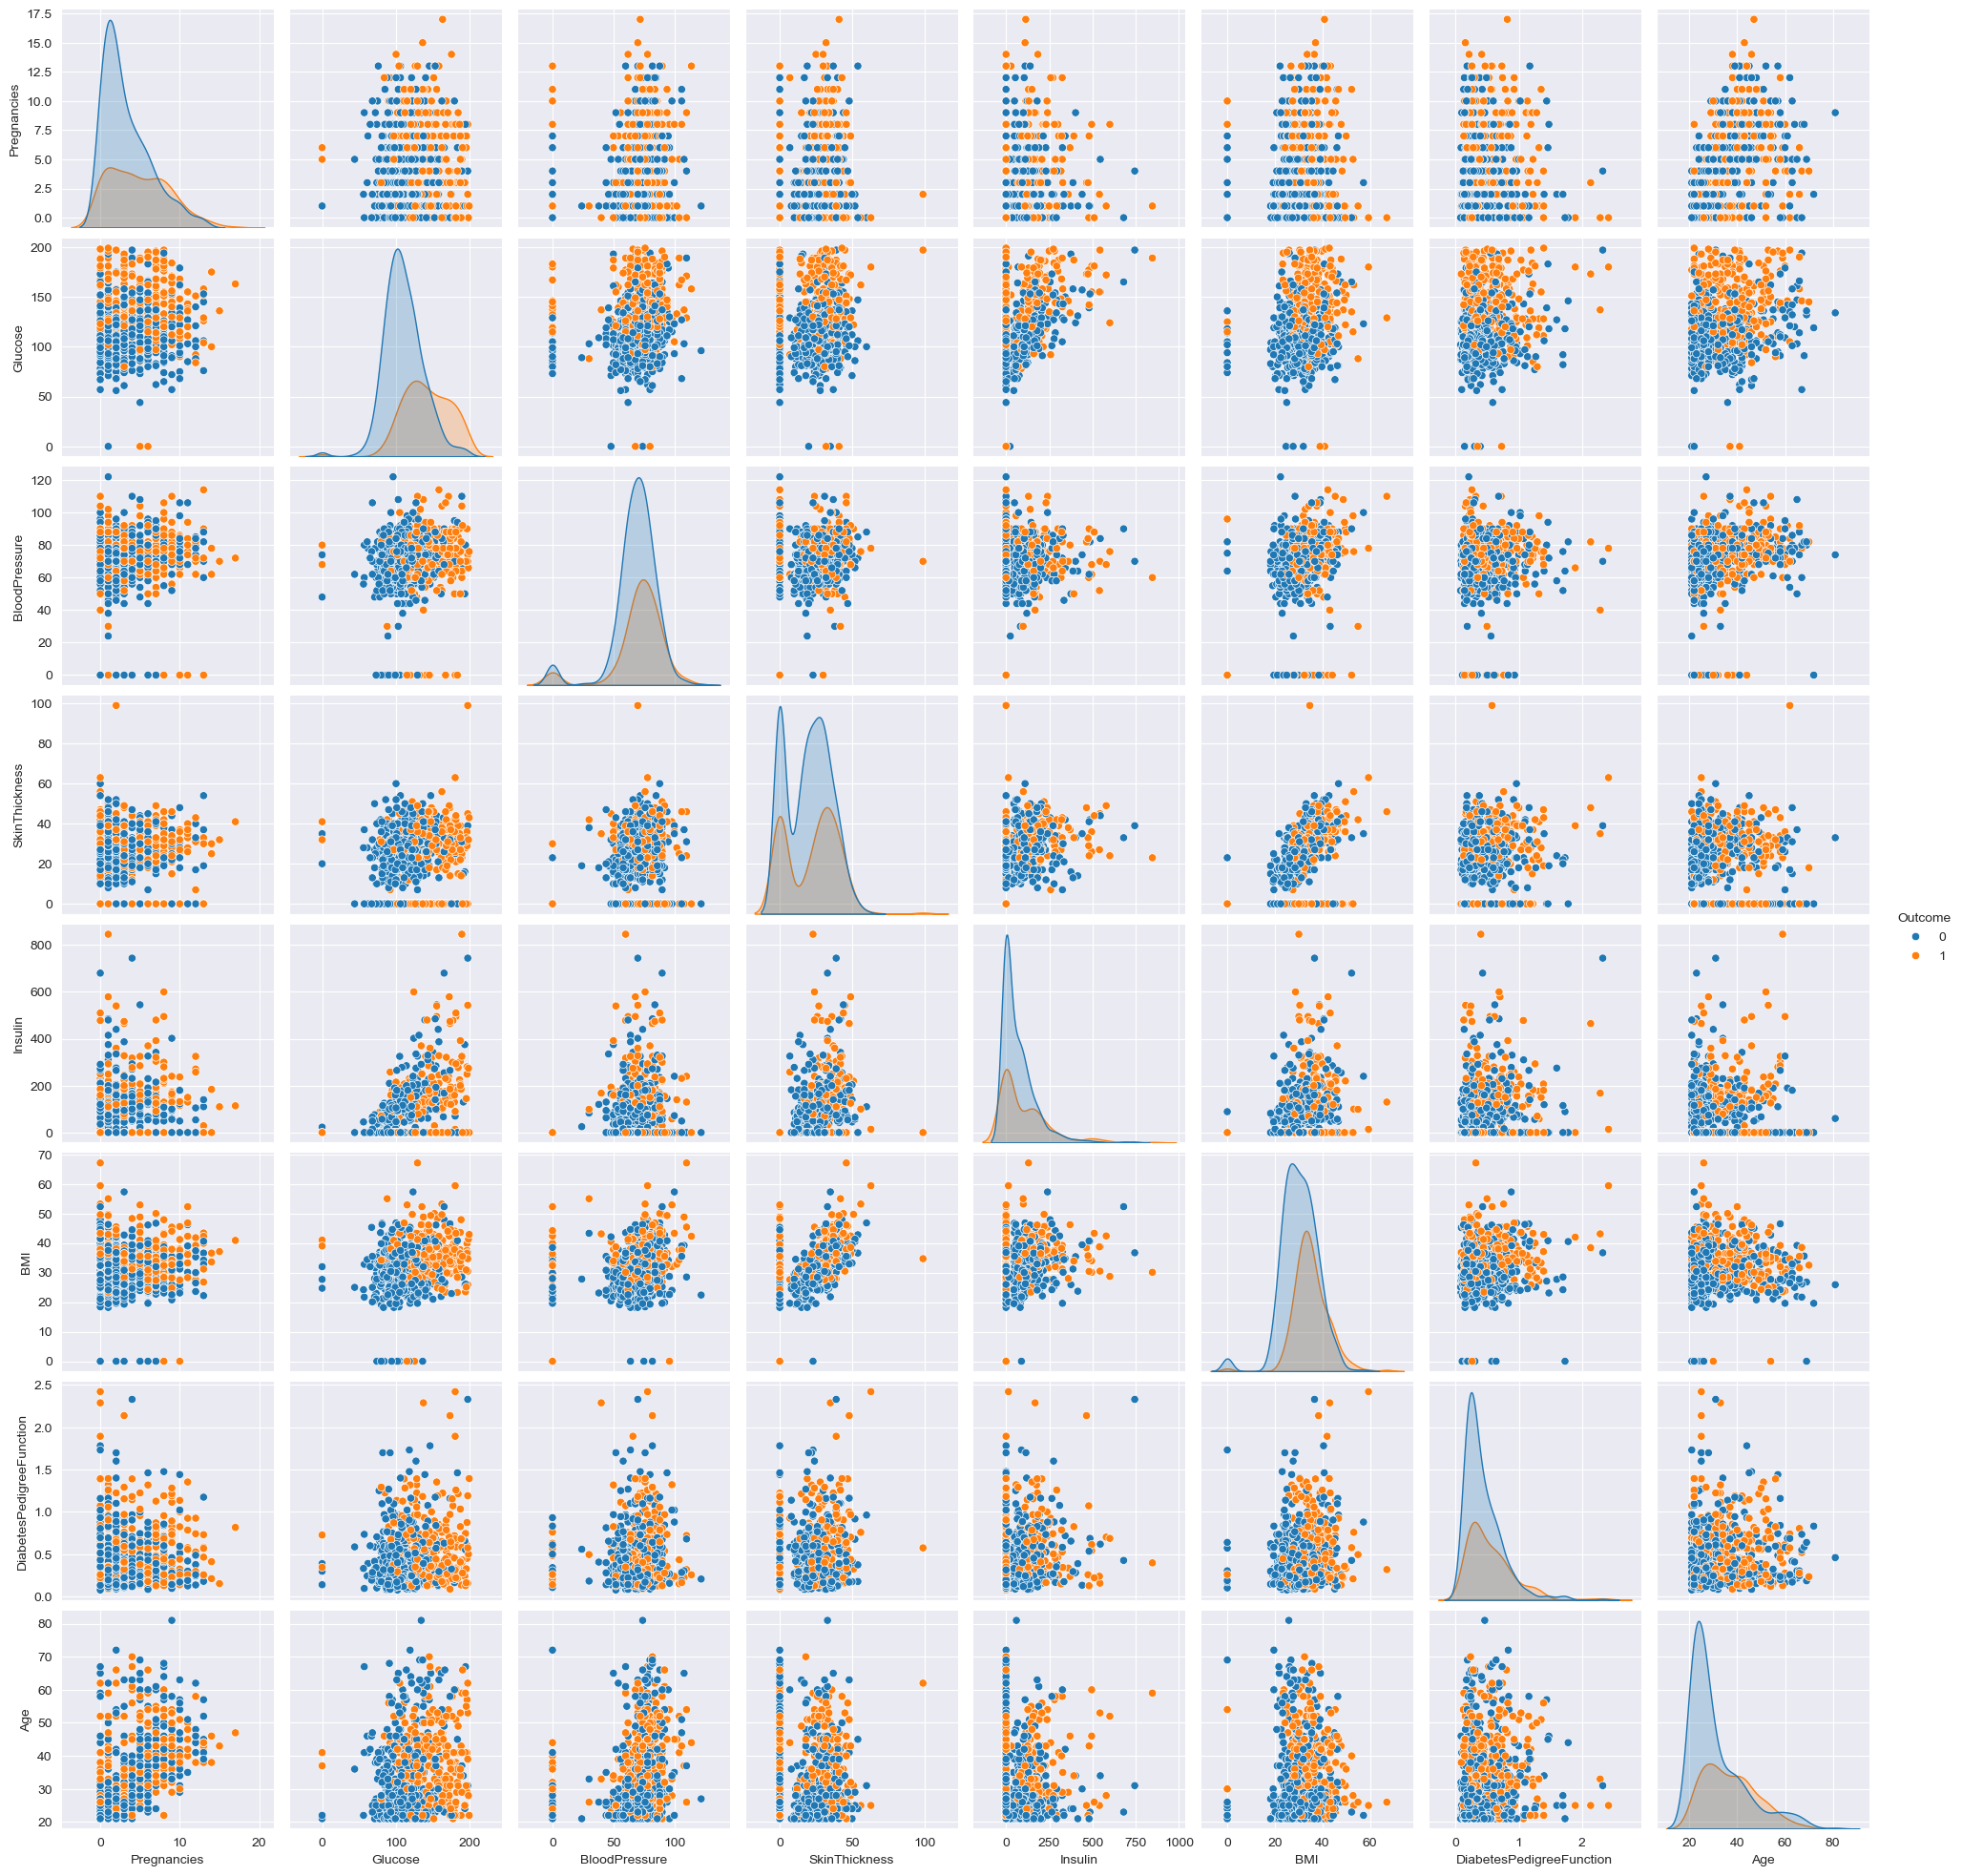

In [58]:
# Class Distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

# Boxplots to check outliers
df.plot(kind='box', figsize=(15, 6), subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# Pairplot to see scatter plots
sns.pairplot(df, hue='Outcome')
plt.show()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
col_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[col_with_zeros] = df[col_with_zeros].replace(0,np.nan)

In [62]:
df[col_with_zeros].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [64]:
df.fillna(df.median(),inplace = True)

In [65]:
X = df.drop('Outcome',axis = 1).values
y = df['Outcome'].values

X= (X-np.mean(X,axis=0))/np.std(X,axis=0)
X= np.c_[np.ones(X.shape[0]),X]

In [66]:
split_data = int(0.8 * len(X))
X_train, X_test = X[:split_data], X[split_data:]
y_train, y_test = y[:split_data], y[split_data:]

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    # Binary cross-entropy loss
    return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)

    loss_history = []

    for i in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        error = y_pred - y
        gradient = np.dot(X.T, error) / m
        weights -= lr * gradient

        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            loss_history.append(loss)
            print(f'Epoch {i}, Loss: {loss:.4f}')

    return weights


In [83]:
weights = gradient_descent(X_train, y_train, lr=0.1, epochs=1000)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4723
Epoch 200, Loss: 0.4630
Epoch 300, Loss: 0.4611
Epoch 400, Loss: 0.4606
Epoch 500, Loss: 0.4605
Epoch 600, Loss: 0.4605
Epoch 700, Loss: 0.4605
Epoch 800, Loss: 0.4605
Epoch 900, Loss: 0.4605


In [84]:
# Predict on test data
y_test_pred = sigmoid(np.dot(X_test, weights)) >= 0.5

# Accuracy
accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy:", accuracy)

# Optional confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.7662337662337663
Confusion Matrix:
[[88 11]
 [25 30]]


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use same train/test data (already standardized and split)
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)

# Predict
y_pred_sklearn = model_sklearn.predict(X_test)


In [86]:
y_pred_scratch = sigmoid(np.dot(X_test, weights)) >= 0.5


In [87]:
print("=== Scratch Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scratch))
print("Classification Report:\n", classification_report(y_test, y_pred_scratch))

print("\n=== Sklearn Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))
print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))


=== Scratch Model ===
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[88 11]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


=== Sklearn Logistic Regression ===
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[88 11]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

